# Tarea 02 Métodos Computacionales
## Gabriel Cataño Sánchez
### CC: 1039474879

In [1]:
#Librerias
import pandas as pd
import seaborn as sns

## Problema 1.

In [16]:
path = 'PS4_1.xls'
def problema1(path):
    """
    Función que nos da una serie de características de un DataFrame.
    
    Parameters:
    -----------
    path : Dataset que queremos analizar.
    
    Output:
    -----------
    Diccionario: Diccionario con los valores que queremos sacar del dataset.
    
    """
    
    #Lectura del dataset
    df = pd.read_csv(path)

    #Elimia la columna con ese nombre del DataFrame
    del df["Unnamed: 1"]
    
    #Cambiar el nombre de una columna(Date)
    df.columns = ["Serie de Tiempo", "Berri1",	"Maisonneuve_1",	"Maisonneuve_2"	,"Brebeuf"]
    
    #Número de columnas
    columnas = len(df.columns)
    
    #Nombre de las columnas
    nombre = df.columns
    
    #Información del DataFrame
    info = df.describe()
    
    #Conteo de los datos de cada columna, no incluye los NaN 
    registros = info.loc["count"]
            
    #Memoria usada por cada columna
    memory = df.memory_usage() 
    
    #Estadíssticas de cada columna (Media, desviación estándar, mínimo, máximo...)
    s1 = info["Berri1"]
    s2 = info["Maisonneuve_1"]
    s3 = info["Maisonneuve_2"]
    s4 = info["Brebeuf"]
    
    #Separar 
    s = '________________________________________________________'
    p = '________________________________________________________'
    l = '________________________________________________________'
    t = '________________________________________________________'
   
    #Remplazar los valores de NaN por None
    df = df.fillna('None')
    
    #Diccionario con todos los valores hallados en la función
    diccionario = {"Cantidad de Columnas" : columnas, "f":s, "Nombre de las Columnas": nombre,"p":p,\
                        "Registros" : registros,"l":l, "Memoria Usada" : memory,\
                           "Estadísticas": s, "-":s1,".":s2,",":s3,"°":s4,"t": t, "No NaN": df}
   
    return diccionario

In [17]:
path = 'PS4_1.xls'
problema1(path)

{'Cantidad de Columnas': 5,
 'f': '________________________________________________________',
 'Nombre de las Columnas': Index(['Serie de Tiempo', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
        'Brebeuf'],
       dtype='object'),
 'p': '________________________________________________________',
 'Registros': Berri1           365.0
 Maisonneuve_1    365.0
 Maisonneuve_2    365.0
 Brebeuf          178.0
 Name: count, dtype: float64,
 'l': '________________________________________________________',
 'Memoria Usada': Index               128
 Serie de Tiempo    2920
 Berri1             2920
 Maisonneuve_1      2920
 Maisonneuve_2      2920
 Brebeuf            2920
 dtype: int64,
 'Estadísticas': '________________________________________________________',
 '-': count     365.000000
 mean     2032.200000
 std      1878.879799
 min         0.000000
 25%       194.000000
 50%      1726.000000
 75%      3540.000000
 max      6626.000000
 Name: Berri1, dtype: float64,
 '.': count     365.000

## Problema 2.

In [18]:
#Lectura del dataset
path = 'Crimes_-_2019.csv'
cr19 =  pd.read_csv(path)
#cr19

In [19]:
#Crear un dataframe en blanco para filtrar columnas
cr = pd.DataFrame()

#Agrega las columnas que queremos a partir del dataframe original
cr["Type"] =  cr19["Primary Type"]
cr["Date"]  = cr19["Date"]

#Darle formato a la fecha para poder trabajar con uno estándar
cr.Date = pd.to_datetime(cr.Date, format="%m/%d/%Y %I:%M:%S %p")
#cr

In [20]:
#Agrupar y ordenar el dataframe por tipo de crimen, haciendo un conteo sobre las fechas
data_info = cr.groupby(["Type"]).Date.count().sort_values(ascending = False)
data_info = data_info.reset_index()

#Convertir la información obtenida de nuevo en un dataframe
data_info = pd.DataFrame(data_info)

In [21]:
#Limitar el número de filas en la información obtenida
data_info = data_info.iloc[:22]

#Entrega los crimenes y la cantidad que hubo en ese año
data_info

,Type,Date
0,THEFT,62439
1,BATTERY,49495
2,CRIMINAL DAMAGE,26680
3,ASSAULT,20618
4,DECEPTIVE PRACTICE,18600
5,OTHER OFFENSE,16747
6,NARCOTICS,15059
7,BURGLARY,9635
8,MOTOR VEHICLE THEFT,8974
9,ROBBERY,7992


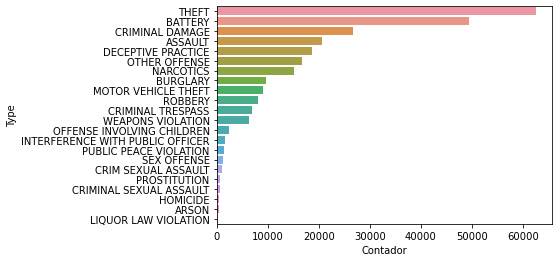

In [22]:
#Grafica de los datos con seaborn
data_info = data_info.rename(columns = {"Date" : "Contador"})
ax = sns.barplot(x = "Contador", y="Type", data = data_info)

## Problema 3.

In [23]:
#Lectura del Dataset
path = 'country_vaccinations.csv'
vc = pd.read_csv(path)

In [24]:
#Filtro de Dataset para varios paises

#Dataset para Colombia
cvc = vc[vc['country'] == 'Colombia']

#Dataset para Brazil
bvc = vc[vc['country'] == 'Brazil']

#Dataset para Argentina
avc = vc[vc['country'] == 'Argentina']

#Dataset para Mexico
mvc = vc[vc['country'] == 'Mexico']

##Dataset para Peru
pvc = vc[vc['country'] == 'Peru']

#Converssión de los datos filtrados para cada pais a un archivo .csv
cvc.to_csv("Colombia.csv")
bvc.to_csv('Brazil.csv')
avc.to_csv('Argentina.csv')
mvc.to_csv('Mexico.csv')
pvc.to_csv('Peru.csv')

### 3.1 y 3.2. Dataset filtrado para Colombia.

In [25]:
#Lectura del dataset
path = 'Colombia.csv'
cva = pd.read_csv(path)

#Crea un Dataframe en blanco
vacunas = pd.DataFrame()

#Adjunta columnas al dataframe en blanco desde el dataset
vacunas["Country"] = cva['country']
vacunas["Date"] = cva["date"]
vacunas["Acumulado_vacunas"] = cva["total_vaccinations"]

#Nuevo dataframe con filtros de algunas columnas
vacunas

,Country,Date,Acumulado_vacunas
0,Colombia,2021-02-17,18.0
1,Colombia,2021-02-18,9935.0
2,Colombia,2021-02-19,21307.0
3,Colombia,2021-02-20,33140.0
4,Colombia,2021-02-21,39827.0
5,Colombia,2021-02-22,45166.0
6,Colombia,2021-02-23,48150.0
7,Colombia,2021-02-24,50524.0
8,Colombia,2021-02-25,66157.0
9,Colombia,2021-02-26,81333.0


### 3.3. Comparación entre países.

In [31]:
#Lectura de los dastaset para los otros países
#Se leen los dataset de cada país, se crea un dataframe en blanco
#se escogen tres columnas del dataset y se agregan al dataframe en blanco,
#las columnas que quedadn son: País, Fecha y Total de vacunas por país

#Brazil
path = 'Brazil.csv'
cva = pd.read_csv(path)
vacina = pd.DataFrame()
vacina["Country"] = cva['country']
vacina["Date"] = cva["date"]
vacina["Acumulado_vacunas"] = cva["total_vaccinations"]
#vacina

#Argentina
path = 'Argentina.csv'
cva = pd.read_csv(path)
vac = pd.DataFrame()
vac["Country"] = cva['country']
vac["Date"] = cva["date"]
vac["Acumulado_vacunas"] = cva["total_vaccinations"]
vac

#Mexico
path = 'Mexico.csv'
cva = pd.read_csv(path)
vacu = pd.DataFrame()
vacu["Country"] = cva['country']
vacu["Date"] = cva["date"]
vacu["Acumulado_vacunas"] = cva["total_vaccinations"]
#vacu

#Peru
path = 'Peru.csv'
cva = pd.read_csv(path)
vacun = pd.DataFrame()
vacun["Country"] = cva['country']
vacun["Date"] = cva["date"]
vacun["Acumulado_vacunas"] = cva["total_vaccinations"]
#vacun

In [27]:
#Obtención de la última fila del DataFrame vacunas para cada país
colombia = vacunas.iloc[-1]   
brazil = vacina.iloc[-1]
argentina = vac.iloc[-1]
mexico = vacu.iloc[-1]
peru = vacun.iloc[-1]

#Diccionario que graba las filas obtenidas anteriormente
dicc = {"_": colombia, "°": brazil, ".": mexico, "-": argentina, ",": peru}

#Convertimos el diccionario en DataFrame
df = pd.DataFrame(dicc)

#Arroja los resultados del DataFrame con la cantidad de vacunas a la fecha por país
print("Vacunas a la fecha :" ,df)

Vacunas a la fecha :                             _           °           .           -           ,
Country              Colombia      Brazil      Mexico   Argentina        Peru
Date               2021-04-02  2021-04-03  2021-04-03  2021-04-03  2021-04-02
Acumulado_vacunas   2336144.0  20956770.0   8987190.0   4178896.0    857493.0


### 3.4. Vacunas por país entre 1.5E6 y 2.0E6

In [28]:
#Carga el dataframe que ya se había leido con la estadística general de vacunas por país
vc

#Creación de un dataframe vacío
vaccine = pd.DataFrame()

#Agregar columnas al dataframe vacío a partir del ataframe original
#Se dejan tres columnas: País, Fecha y Total de vacunas por país
vaccine["Country"] = vc['country']
vaccine["Date"] = vc["date"]
vaccine["Acumulado_vacunas"] = vc["total_vaccinations"]
#vaccine

#Creación de la máscara para filtrar la cantidad de vacunas
mask = vaccine.Acumulado_vacunas.between(1.5e6 , 2.1e6)

#Aplicación de la máscara, devuelve los paises que 
#acumulan entre 1.5E6 y 2.0E6 vacunados por fecha.
vaccine = vaccine[mask]
vaccine

,Country,Date,Acumulado_vacunas
361,Argentina,2021-03-07,1526078.0
362,Argentina,2021-03-08,1546699.0
363,Argentina,2021-03-09,1648957.0
364,Argentina,2021-03-10,1774438.0
365,Argentina,2021-03-11,1919074.0
...,...,...,...
9527,Wales,2021-03-29,1837726.0
9528,Wales,2021-03-30,1865120.0
9529,Wales,2021-03-31,1893423.0
9530,Wales,2021-04-01,1920657.0


In [30]:
#Organización de los valores obtenidos con el filtro por país
info = vaccine.groupby(["Country"]).Date.count().sort_values(ascending = True)
info = info.reset_index()

#Muestra los países que han vacunado entre 1.5E6 y 2.0E6 personas, haciendo un conteo 
#en la cantidad de días que están en ese intervalo
info

,Country,Date
0,Portugal,1
1,Nepal,1
2,China,1
3,Switzerland,1
4,United States,1
5,Netherlands,3
6,Bangladesh,3
7,Brazil,3
8,Morocco,3
9,Sweden,3
